In [2]:
required_packages = [
    "langgraph", 
    "langgraph-sdk", 
    "langgraph-checkpoint-sqlite", 
    "langsmith", 
    "langchain-community", 
    "langchain-core", 
    "langchain-openai", 
    "notebook", 
    "python-dotenv", 
    "chromadb"
]

In [8]:
for package in required_packages:
    %pip install {package}

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [10]:
# SiteMap loader
LANGGRAPH_DOCS = [
    "https://langchain-ai.github.io/langgraph/",
    "https://langchain-ai.github.io/langgraph/tutorials/customer-support/customer-support/",
    "https://langchain-ai.github.io/langgraph/tutorials/chatbots/information-gather-prompting/",
    "https://langchain-ai.github.io/langgraph/tutorials/code_assistant/langgraph_code_assistant/",
    "https://langchain-ai.github.io/langgraph/tutorials/multi_agent/multi-agent-collaboration/",
    "https://langchain-ai.github.io/langgraph/tutorials/multi_agent/agent_supervisor/",
    "https://langchain-ai.github.io/langgraph/tutorials/multi_agent/hierarchical_agent_teams/",
    "https://langchain-ai.github.io/langgraph/tutorials/plan-and-execute/plan-and-execute/",
    "https://langchain-ai.github.io/langgraph/tutorials/rewoo/rewoo/",
    "https://langchain-ai.github.io/langgraph/tutorials/llm-compiler/LLMCompiler/",
    "https://langchain-ai.github.io/langgraph/concepts/high_level/",
    "https://langchain-ai.github.io/langgraph/concepts/low_level/",
    "https://langchain-ai.github.io/langgraph/concepts/agentic_concepts/",
    "https://langchain-ai.github.io/langgraph/concepts/human_in_the_loop/",
    "https://langchain-ai.github.io/langgraph/concepts/multi_agent/",
    "https://langchain-ai.github.io/langgraph/concepts/persistence/",
    "https://langchain-ai.github.io/langgraph/concepts/streaming/",
    "https://langchain-ai.github.io/langgraph/concepts/faq/"
]

In [12]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma

In [ ]:
import os

# Set environment variables
os.environ["OPENAI_API_KEY"] = "add-open-ai-key"
os.environ["LANGCHAIN_API_KEY"] = "add-langchain-key"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langgraph-101"

In [24]:
def get_vector_db_retriever():
    embd = OpenAIEmbeddings()
    
    urls = LANGGRAPH_DOCS
    docs = [WebBaseLoader(url).load() for url in urls] # [[doc1], [doc2]]
    # print(docs)
    docs_list = [item for sublist in docs for item in sublist]
    # print(docs_list)
    
    text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size = 200, chunk_overlap = 0)
    
    doc_splits = text_splitter.split_documents(docs_list)
    
    vectorstore = Chroma.from_documents(
            documents=doc_splits,
        collection_name="rag-chroma",
        embedding = embd
    )
    retriever = vectorstore.as_retriever(lambda_mult= 0)
    return retriever

In [40]:
retriever = get_vector_db_retriever()

In [26]:
from dotenv import load_dotenv
load_dotenv(dotenv_path = "../.env", override = True)

False

In [27]:
import os
from langsmith import utils

os.environ.get("LANGCHAIN_TRACING_V2")
utils.tracing_is_enabled()

True

In [28]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model_name = "gpt-4o", temperature = 0)

In [31]:
from langchain_core.messages import AIMessage, HumanMessage

In [34]:
messages = [AIMessage(content = f"So you said you were reasearch ocean animals?", name = "Model")]
messages.append(HumanMessage(content = f"So you said you were reasearch ocean animals", name = "Nobel"))
messages.append(HumanMessage(content = f"Great what would you like to know", name = "Model"))
messages.append(HumanMessage(content = f"I want to learn mode about where to find ocras or blue whalesin the US", name = "Nobel"))

In [35]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were reasearch ocean animals?
================================ Human Message =================================
Name: Nobel

So you said you were reasearch ocean animals
================================ Human Message =================================
Name: Model

Great what would you like to know
================================ Human Message =================================
Name: Nobel

I want to learn mode about where to find ocras or blue whalesin the US


In [36]:
llm.invoke(messages)

AIMessage(content="Orcas (also known as killer whales) and blue whales can be found in various locations along the U.S. coast, but their presence can vary depending on the time of year and environmental conditions. Here's a general guide on where you might find them:\n\n### Orcas\n- **Pacific Northwest**: Orcas are commonly found in the waters of the Pacific Northwest, particularly around the San Juan Islands in Washington State. The Southern Resident orcas are a well-known group in this area.\n- **California Coast**: Transient orcas, which are different from the resident orcas, can be seen along the California coast. They are often spotted around Monterey Bay.\n- **Alaska**: Orcas are also prevalent in the waters of Alaska, especially in areas like the Kenai Fjords and around the Inside Passage.\n\n### Blue Whales\n- **California Coast**: Blue whales are often seen off the coast of California, particularly in the summer and fall. The waters around the Channel Islands and Monterey Bay 

In [37]:
RAG_PROMPT = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.

Question: {question} 
Context: {context} 
Answer:"""

In [69]:
from langchain.schema import Document
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    
    question: str
    generation: str
    documents: List[Document]

In [84]:
def retrieveDocs(state: GraphState):
    question = state["question"]
    
    ## retrieve relevant docs
    documents = retriever.invoke(question)
    return {"documents": documents, "question":question}

def generate_resp(state: GraphState):
    question = state["question"]
    documents = state["documents"]
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    rag_prompt_formatted = RAG_PROMPT.format(context = formatted_docs, question = question)
    generation = llm.invoke([HumanMessage(content = rag_prompt_formatted)])
    return {"documents": documents, "question": question, "generation": generation}

In [85]:
from langgraph.graph import StateGraph
graph_builder = StateGraph(GraphState)

In [86]:
from langgraph.graph import START, END

In [87]:
graph_builder.add_node("retrieveDocs", retrieveDocs)
graph_builder.add_node("generate_resp", generate_resp)

In [88]:
graph_builder.add_edge(START, "retrieveDocs")
graph_builder.add_edge("retrieveDocs", "generate_resp")
graph_builder.add_edge("generate_resp", END)

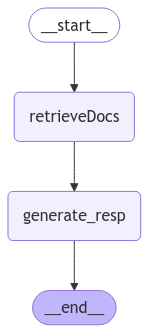

In [89]:
from IPython.display import Image, display

simple_rag_graph = graph_builder.compile()
display(Image(simple_rag_graph.get_graph().draw_mermaid_png()))

In [91]:
question = "Does Langgraph work with OSS LLMs?"
simple_rag_graph.invoke({"question": question})

{'question': 'Does Langgraph work with OSS LLMs?',
 'generation': AIMessage(content='Yes, LangGraph works with OSS LLMs. It is ambivalent to the type of LLMs used, although closed LLMs are often used in tutorials due to their support for tool calling. However, tool calling is not necessary, so OSS LLMs can be used with LangGraph.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 549, 'total_tokens': 611, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': None}, id='run-741467eb-89ee-4341-814e-93c0e35fbcf5-0', usage_metadata={'input_tokens': 549, 'output_tokens': 62, 'total_tokens': 611, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detail

In [93]:
## example of conditional edges

from typing import Literal
def cond_edge(state) -> Literal["n1", "n2"]:
    
    ## logic ###
    d1 = state["documents"]
    d2 = state["question"]
    
    if d1 == d2:
        return "n1"
    return "n2"